<a href="https://colab.research.google.com/github/hana-magdy/Image-Segmentation/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [ ]:
import zipfile
import os
import numpy as np
from PIL import Image
import scipy.io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import math
import cv2
import sklearn.cluster as SC
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from random import randint


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.Download the Dataset and Understand the Format.

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Pattern Recognition projects/Image Segmentation/Dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Pattern Recognition projects/Image Segmentation/set.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
Names=os.listdir('/content/Dataset/images/')


Images_Path='/content/Dataset/images/'
groundTruth_Path='/content/Dataset/groundTruth/'

images=[]
groundTruth=[]

for name in Names:
  img = cv2.imread(str(Images_Path+name))
  images.append(np.array(img))
  mat = scipy.io.loadmat(str(groundTruth_Path+str(name.replace('.jpg','.mat'))))
  groundTruth.append(mat)
  



#print(np.array(images).shape)
#print(np.array(images[0]))
#print(np.array(images[1]).shape)
#print(np.array(images[2]).shape)
#print(np.array(images[3]).shape)
#print(np.array(images[4]).shape)
#print(np.array(images[0]))



##Visualization 

In [ ]:
def Visualization(index):
  plt.imshow(images[index])
  plt.figure()

  for i in range(0,5):
     plt.imshow(groundTruth[index]['groundTruth'][0][i][0][0][0])
     plt.figure()
     plt.imshow(groundTruth[index]['groundTruth'][0][i][0][0][1],cmap='binary')
     plt.figure()
  
 



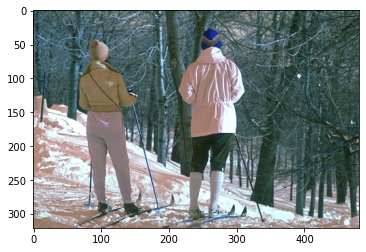

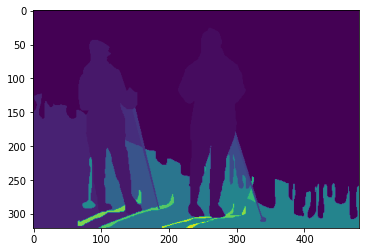

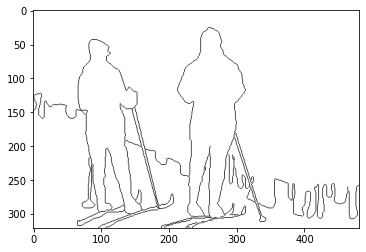

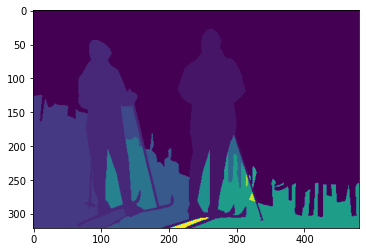

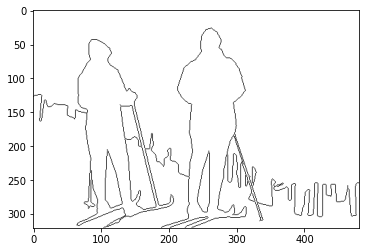

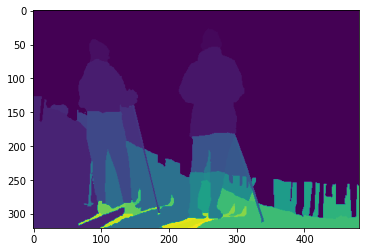

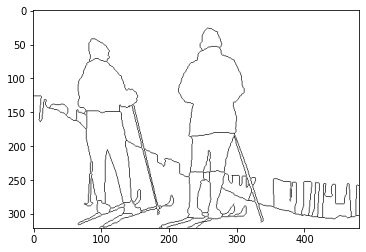

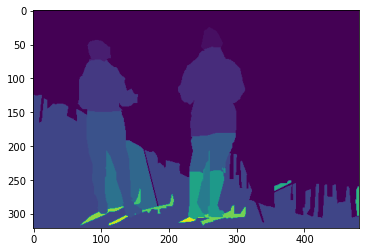

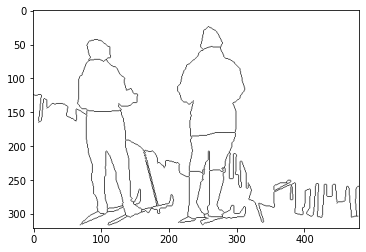

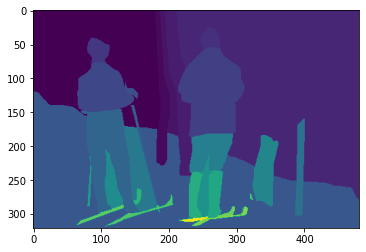

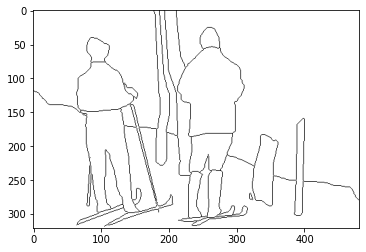

<Figure size 432x288 with 0 Axes>

In [ ]:
Visualization(6)

##K-Means Clustering

In [ ]:
def kmeans(ind,k,images):
  #image = cv2.cvtColor(images[ind])
  image = cv2.cvtColor(images[ind], cv2.COLOR_BGR2RGB)
  images[ind]= cv2.cvtColor(images[ind], cv2.COLOR_RGB2BGR)
  pixel_vals = image.reshape((-1,3))
  pixel_vals = np.float32(pixel_vals)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
  retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]
  segmented_image = segmented_data.reshape((image.shape))
  return segmented_image,labels
  plt.imshow(segmented_image)

In [ ]:
Labels3 = []
images3=[]
for i in range(len(images)):
  segmented_image_3,Labels=kmeans(i,3,images)
  Labels3.append(Labels)
  images3.append(segmented_image_3)





In [ ]:
Labels5 = []
images5=[]
for i in range(len(images)):
  segmented_image_5,Labels=kmeans(i,5,images)
  Labels5.append(Labels)
  images5.append(segmented_image_5)


In [ ]:
Labels7 = []
images7=[]
for i in range(len(images)):
  segmented_image_7,Labels=kmeans(i,7,images)
  Labels7.append(Labels)
  images7.append(segmented_image_7)



In [ ]:
Labels9 = []
images9=[]
for i in range(len(images)):
  segmented_image_9,Labels=kmeans(i,9,images)
  Labels9.append(Labels)
  images9.append(segmented_image_9)



In [ ]:
Labels11 = []
images11=[]
for i in range(len(images)):
  segmented_image_11,Labels=kmeans(i,11,images)
  Labels11.append(Labels)
  images11.append(segmented_image_11)



Original photo


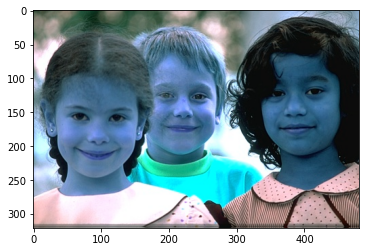

k=3


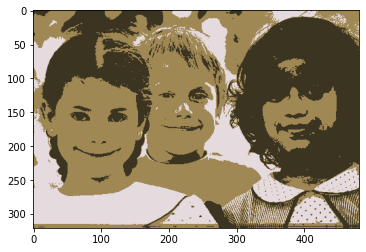

k=5


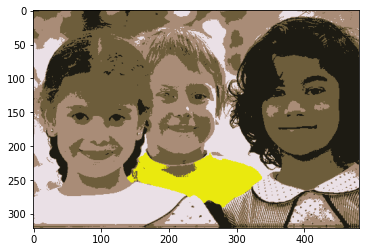

k=7


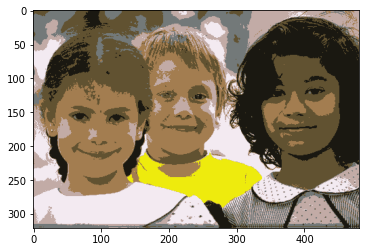

k=9


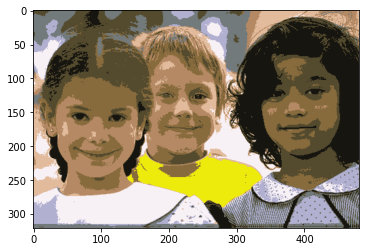

k=11


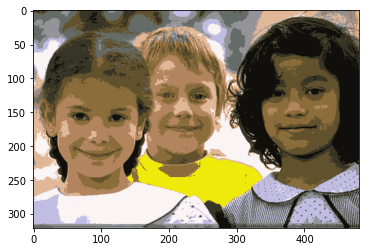

In [ ]:
x=44
print("Original photo")
plt.imshow(images[x])
plt.show()

print("k=3")
plt.imshow(images3[x])
plt.show()

print("k=5")
plt.imshow(images5[x])
plt.show()

print("k=7")
plt.imshow(images7[x])
plt.show()

print("k=9")
plt.imshow(images9[x])
plt.show()

print("k=11")
plt.imshow(images11[x])
plt.show()

### Question 3


In [ ]:
print("Kmeans for 1 image 6")
#Visualization(99)

segmented_image_3_trial,Trial_Label3=kmeans(44,3,images)

segmented_image_5_trial,Trial_Label5=kmeans(44,5,images)

segmented_image_7_trial,Trial_Label7=kmeans(44,7,images)

segmented_image_9_trial,Trial_Label9=kmeans(44,9,images)

segmented_image_11_trial,Trial_Label11=kmeans(44,11,images)

Total_Labels=[Trial_Label3, Trial_Label5, Trial_Label7, Trial_Label9, Trial_Label11]



Kmeans for 1 image 6


## F_Measure and Conditional Entropy

In [ ]:
def Recall(cont_mat,i):
  cont_matT = cont_mat.T # 47,3
  max=np.amax(cont_mat[i])
  max_index_col = np.argmax(cont_mat[i])
  clusterSum=(np.sum(cont_matT[max_index_col]))
  exp=max/clusterSum
  #print("recall for cluster ",str(i)," = ",str(exp))
  return exp # rec_i


In [ ]:
def Purity(cont_mat,i):
  clusterSum=(np.sum(cont_mat))
  max=np.amax(cont_mat)
  exp=max/clusterSum
  #print("purity for cluster ",str(i)," = ",str(exp))
  return exp # purity_i


In [ ]:
def Fmeasure(cont_mat):
  total_F = 0
  for i in range(0,len(cont_mat)):
    prec_i = Purity(cont_mat[i],i)
    #print('prec_i = ' +str(prec_i))
    rec_i = Recall(cont_mat,i)
    #print('rec_i = ' +str(rec_i))
    Fi = (2*prec_i*rec_i)/(rec_i+prec_i)
    print('F-measure for cluster = '+str(i)+" = " +str(Fi))
    total_F = total_F+Fi
  print('Total F = '+str(total_F/len(cont_mat)))
  return total_F


In [ ]:
def Conditional_entropy(cont_mat):
 
  totalEntropy=0

  for i in range (0,len(cont_mat)):
     clusterSum=(np.sum(cont_mat[i]))
     exp=0
     for j in range(0,len(cont_mat[0])):
       if cont_mat[i][j]!=0:
         exp=exp+((-1)*(cont_mat[i][j]/clusterSum)*(math.log(cont_mat[i][j]/clusterSum,2)))
  
     
     print("Entropy for cluster ",str(i)," = ",str(exp))
     totalEntropy=totalEntropy+((clusterSum/np.sum(cont_mat))*exp)
    
     
  print("Conditional Entropy(weighted sum of entropies) = ",totalEntropy)

  return totalEntropy

    

In [ ]:
K=[3,5,7,9,11]
for k in range(0,5):
  sumEntropy=0
  sumF = 0
  for s in range(0,5):
    print("for k=" +str(K[k])+ " and "+str(s+1) +" segmentation gt")
    print(np.array(groundTruth[44]['groundTruth'][0][s][0][0][0]).shape)
    CM=contingency_matrix(groundTruth[44]['groundTruth'][0][s][0][0][0], Total_Labels[k])
    print(CM.T.shape)
    entropy=Conditional_entropy(CM.T)
    sumEntropy=sumEntropy+entropy
    print('*******************F Measure Results************************** ')
    sumF = sumF+Fmeasure(CM.T)
    print("***********")
  print("Average entropy for k= ",str(K[k]),"=",str(sumEntropy/5))
  print("Average F-measure for k= ",str(K[k]),"=",str(sumF/5))
  print("*************************************************************************************")
  


for k=3 and 1 segmentation gt
(321, 481)
(3, 16)
Entropy for cluster  0  =  2.4397542467225417
Entropy for cluster  1  =  2.642690994710805
Entropy for cluster  2  =  1.757131407111385
Conditional Entropy(weighted sum of entropies) =  2.2945753091325187
*******************F Measure Results************************** 
F-measure for cluster = 0 = 0.5124506795265235
F-measure for cluster = 1 = 0.378827932396709
F-measure for cluster = 2 = 0.6539144662482912
Total F = 0.5150643593905079
***********
for k=3 and 2 segmentation gt
(321, 481)
(3, 16)
Entropy for cluster  0  =  2.3560418006778296
Entropy for cluster  1  =  2.9812836683211716
Entropy for cluster  2  =  2.6160576586626068
Conditional Entropy(weighted sum of entropies) =  2.7258088521815504
*******************F Measure Results************************** 
F-measure for cluster = 0 = 0.5101997085797548
F-measure for cluster = 1 = 0.3894503216502743
F-measure for cluster = 2 = 0.5217732656514382
Total F = 0.47380776529382246
**********

##Question 4

In [ ]:
Names=os.listdir('/content/set/images/')


Images_Path='/content/set/images/'
groundTruth_Path='/content/set/groundTruth/'

TrialImages=[]
TrialGT=[]
GT=[]
for name in Names:
  img = cv2.imread(str(Images_Path+name))
  TrialImages.append(np.array(img))
  mat = scipy.io.loadmat(str(groundTruth_Path+str(name.replace('.jpg','.mat'))))
  GT.append(mat)

for i in range(0,5):
  temp=[]
  for j in range(0,5):
     temp.append(GT[i]['groundTruth'][0][j][0][0][0])
  TrialGT.append(temp)
  
  



#print(np.array(images).shape)
#print(np.array(images[0]))
#print(np.array(images[1]).shape)
#print(np.array(images[2]).shape)
#print(np.array(images[3]).shape)
#print(np.array(images[4]).shape)
#print(np.array(images[0]))



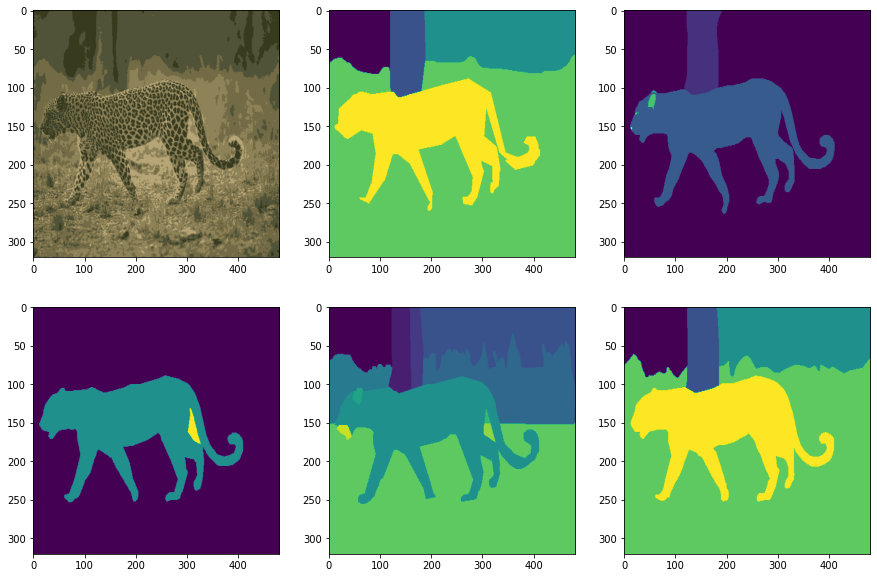

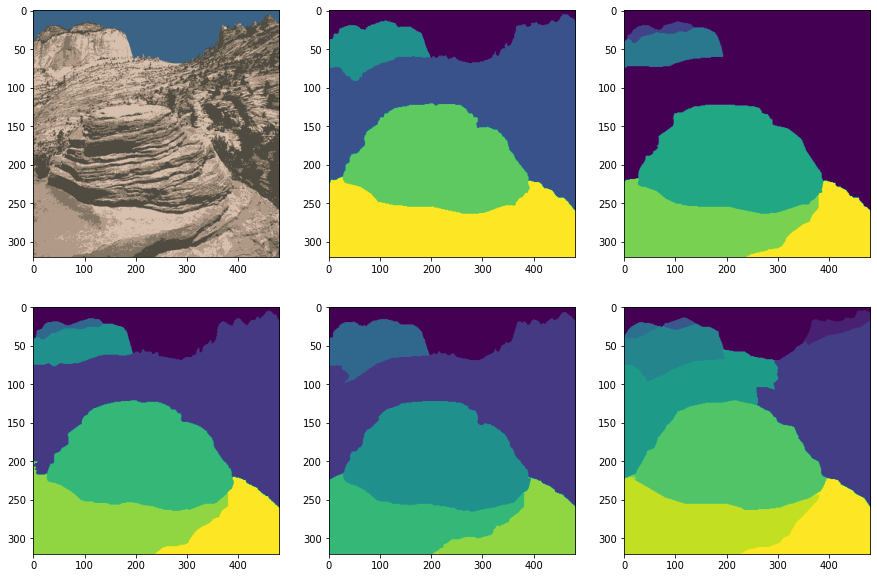

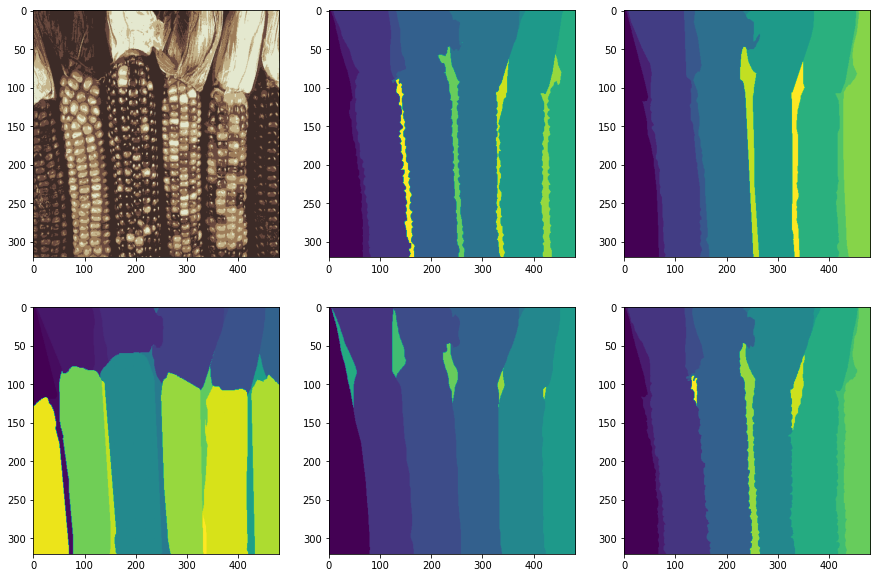

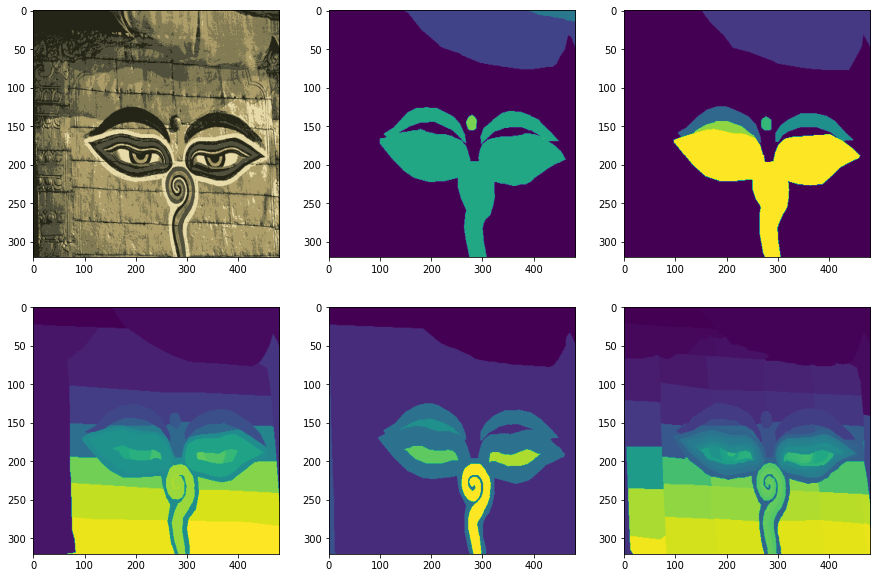

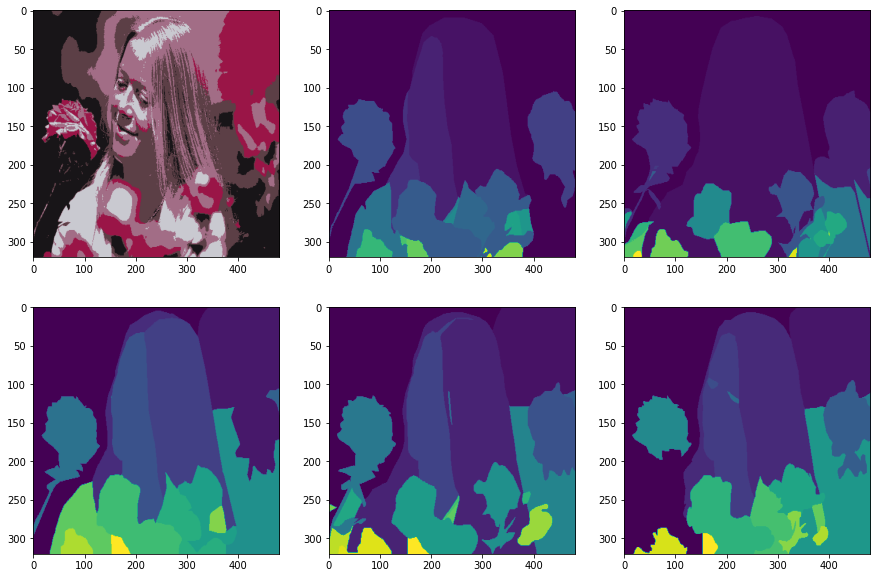

In [ ]:
Segmented_imgs=[]
Segmented_Labels=[]

for i in range(0,5):
  seg_img,seg_label=kmeans(i,5,TrialImages)
  Segmented_imgs.append(seg_img)
  Segmented_Labels.append(seg_label)

  


for i in range(0,5):
  f, axarr = plt.subplots(2,3,figsize=(15,10))
  axarr[0,0].imshow(Segmented_imgs[i],aspect='auto')
  axarr[0,1].imshow(TrialGT[i][0],aspect='auto')
  axarr[0,2].imshow(TrialGT[i][1],aspect='auto')
  axarr[1,0].imshow(TrialGT[i][2],aspect='auto')
  axarr[1,1].imshow(TrialGT[i][3],aspect='auto')
  axarr[1,2].imshow(TrialGT[i][4],aspect='auto')






/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


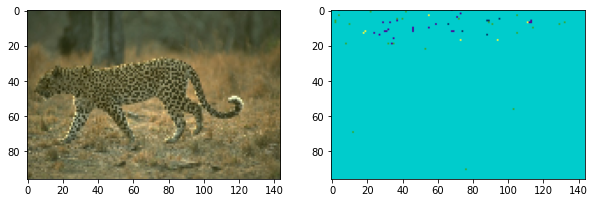

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


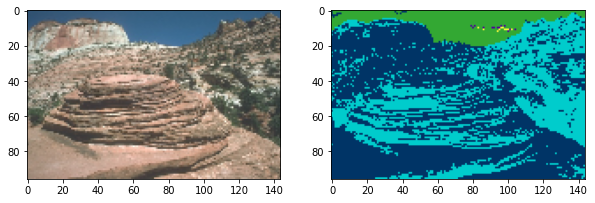

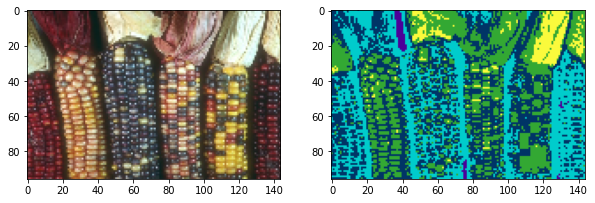

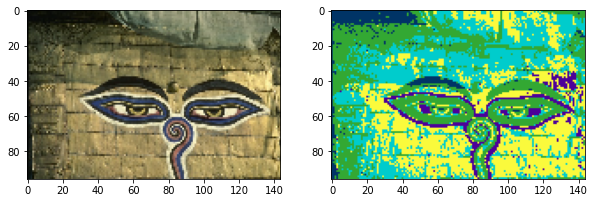

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


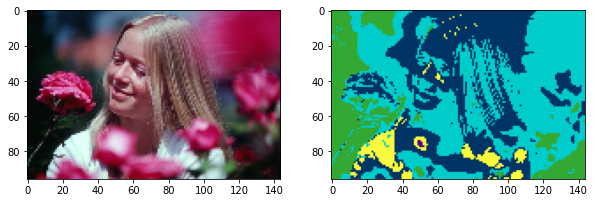

In [ ]:
Segmented_imgsN=[]
LabelsN=[]
colors = [[0,204,204],[0,52,102],[51,168,51],[250,250,60],[76,0,153]]


for i in range(0,5):
  x,y,z=TrialImages[i].shape
  h=int(x*0.30)
  w=int(y*0.30)
  img = Image.fromarray(TrialImages[i].astype('uint8'))
 # print(img.size)
  img = cv2.resize(TrialImages[i], dsize=(w,h))
  #plt.imshow(img)
  #plt.show()
  
  #img = cv2.GaussianBlur(img,(5,5),0)
  #plt.imshow(img)
  #plt.show()
  
  
  temp=np.array(img).reshape(-1,3)
  
  
  #print(temp.shape)

  clustering=SC.SpectralClustering(n_clusters=5,affinity='nearest_neighbors',n_neighbors=5,n_jobs=-1).fit(temp)

  tl=clustering.labels_
  LabelsN.append(tl)
  #tl=tl.reshape(120,80)
  #print(tl)
  #print(clustering.labels_.shape)
  
  formedimg=[]
 
  for j in  range(0,len(tl)):
    formedimg.append(colors[tl[j]])


  formedimg=np.array(formedimg)
  
  #print(formedimg)
  #print(formedimg.shape)
  formedimg=formedimg.reshape(h,w,3)
  Segmented_imgsN.append(formedimg)



  f, axarr = plt.subplots(1,2,figsize=(10,10))
  axarr[0].imshow(img)
  axarr[1].imshow(Image.fromarray((formedimg).astype(np.uint8)))
  plt.show()




  


#for i in range(0,5):
#  f, axarr = plt.subplots(2,3)
#  axarr[0,0].imshow(Segmented_imgs[i])
#  axarr[0,1].imshow(TrialGT[i][0])
#  axarr[0,2].imshow(TrialGT[i][1])
#  axarr[1,0].imshow(TrialGT[i][2])
#  axarr[1,1].imshow(TrialGT[i][3])
#  axarr[1,2].imshow(TrialGT[i][4])


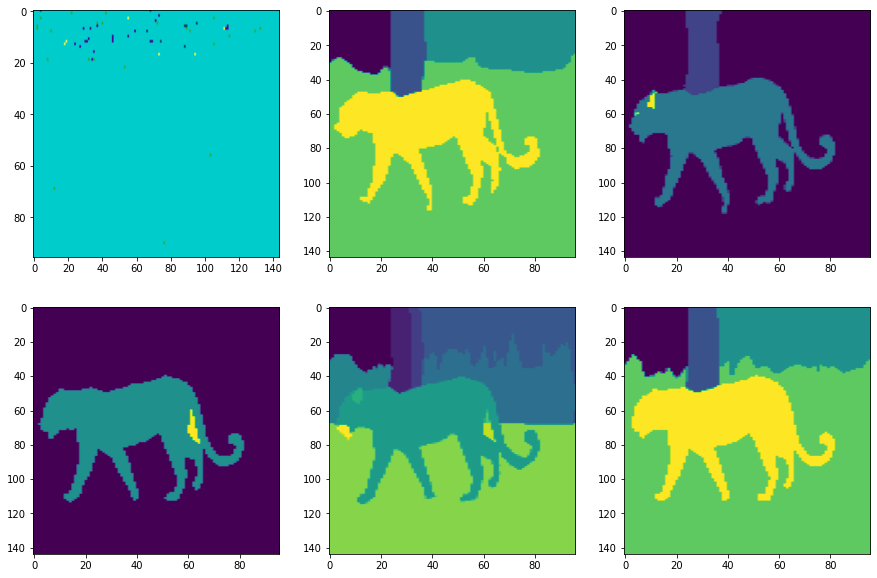

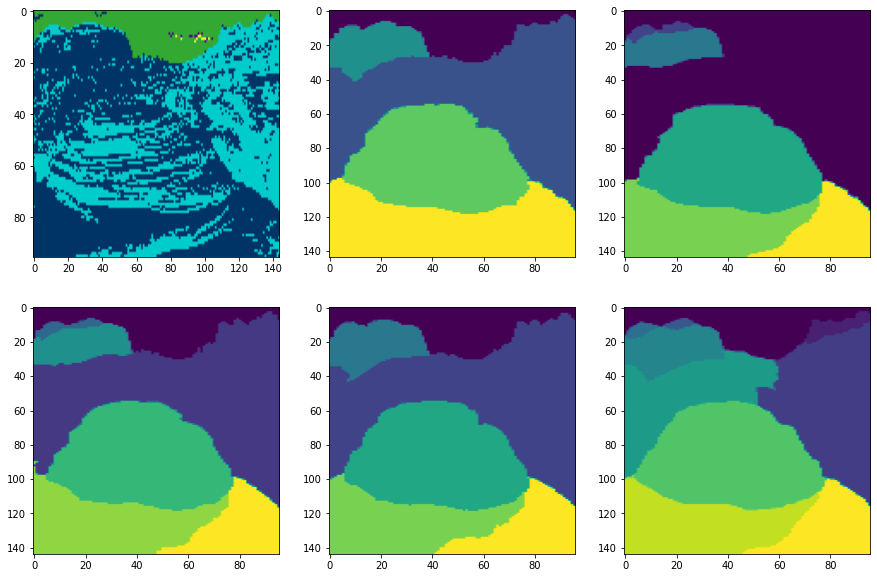

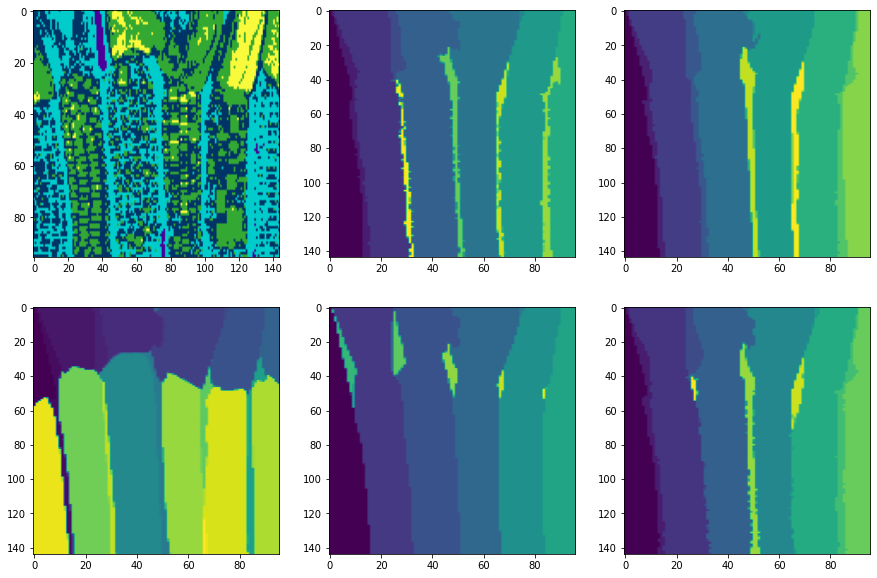

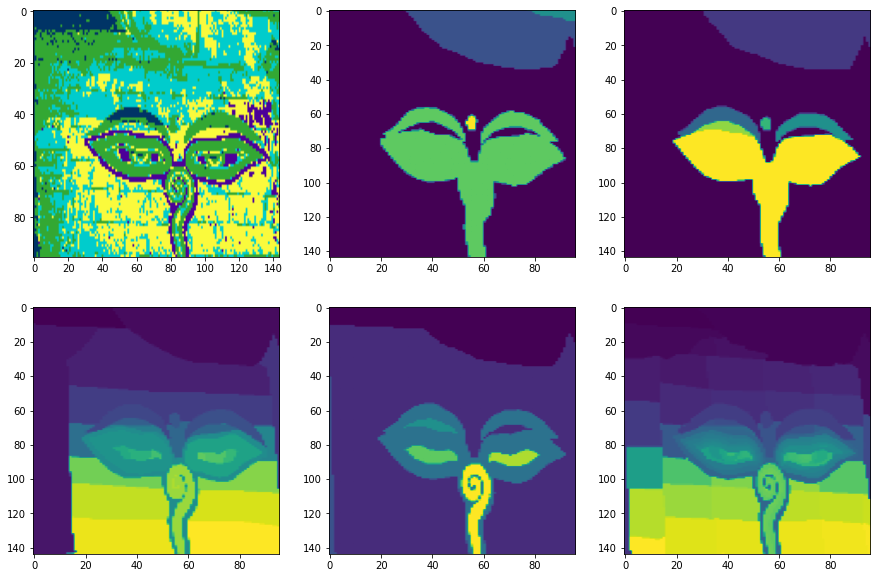

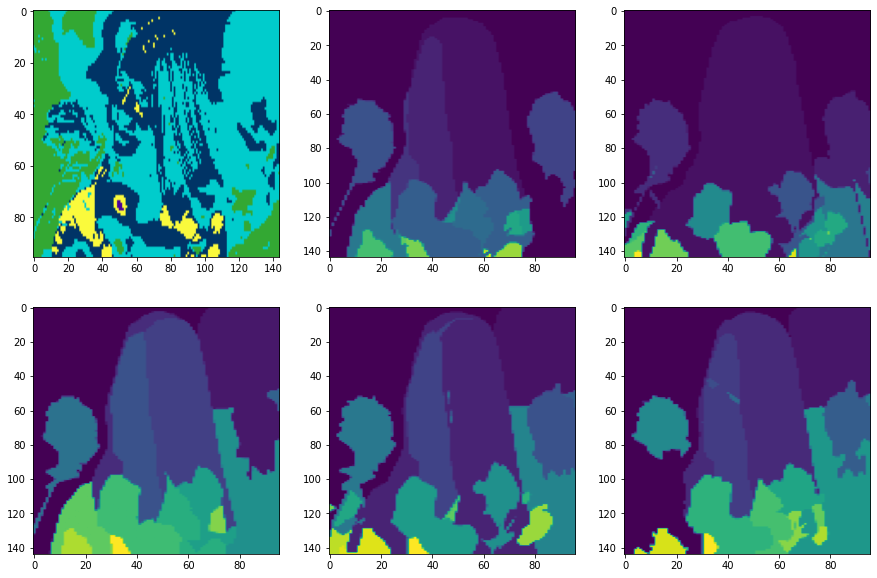

In [ ]:
for i in range(0,5):
  f, axarr = plt.subplots(2,3,figsize=(15,10))
  axarr[0,0].imshow(Segmented_imgsN[i],aspect='auto')
  x=np.array(Segmented_imgsN[i].shape[0])
  y=np.array(Segmented_imgsN[i].shape[1])
  t1=cv2.resize(TrialGT[i][0], dsize=(x,y))
  t2=cv2.resize(TrialGT[i][1], dsize=(x,y))
  t3=cv2.resize(TrialGT[i][2], dsize=(x,y))
  t4=cv2.resize(TrialGT[i][3], dsize=(x,y))
  t5=cv2.resize(TrialGT[i][4], dsize=(x,y))
  axarr[0,1].imshow(t1,aspect='auto')
  axarr[0,2].imshow(t2,aspect='auto')
  axarr[1,0].imshow(t3,aspect='auto')
  axarr[1,1].imshow(t4,aspect='auto')
  axarr[1,2].imshow(t5,aspect='auto')

image  1


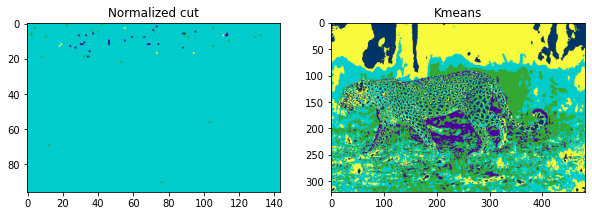

For segmention  1
*****KMEANS******
Entropy for cluster  0  =  0.848995643488536
Entropy for cluster  1  =  1.9023315381071453
Entropy for cluster  2  =  0.6561603190701686
Entropy for cluster  3  =  2.120779539631537
Entropy for cluster  4  =  0.7676684795156863
Conditional Entropy(weighted sum of entropies) =  1.2859976619952993
****************************************** 
F-measure for cluster = 0 = 0.5542618312562105
F-measure for cluster = 1 = 0.3775557522870031
F-measure for cluster = 2 = 0.5089611444775454
F-measure for cluster = 3 = 0.5387898416926477
F-measure for cluster = 4 = 0.14501950585175552
Total F = 0.42491761511303244
*****Normalized cut******
Entropy for cluster  0  =  1.7579994561861843
Entropy for cluster  1  =  0.0
Entropy for cluster  2  =  1.6335513337772531
Entropy for cluster  3  =  1.4591479170272448
Entropy for cluster  4  =  1.040852082972755
Conditional Entropy(weighted sum of entropies) =  1.7556546247521132
****************************************** 
F-me

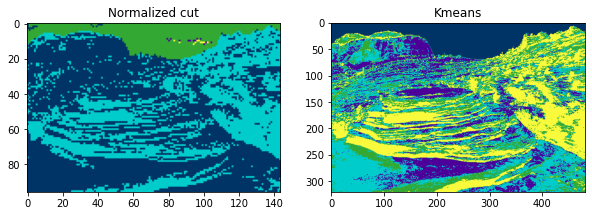

For segmention  1
*****KMEANS******
Entropy for cluster  0  =  1.8104260303500497
Entropy for cluster  1  =  0.2137525939840835
Entropy for cluster  2  =  1.7661235475136787
Entropy for cluster  3  =  1.3820628289691033
Entropy for cluster  4  =  1.9221071706871842
Conditional Entropy(weighted sum of entropies) =  1.5363371162234798
****************************************** 
F-measure for cluster = 0 = 0.4512166978640477
F-measure for cluster = 1 = 0.9837414750654658
F-measure for cluster = 2 = 0.31841256258744893
F-measure for cluster = 3 = 0.44329919230852516
F-measure for cluster = 4 = 0.27269483994421556
Total F = 0.4938729535539406
*****Normalized cut******
Entropy for cluster  0  =  1.8440193606797366
Entropy for cluster  1  =  1.9216772901687116
Entropy for cluster  2  =  1.2111949256015937
Entropy for cluster  3  =  0.7219280948873623
Entropy for cluster  4  =  1.5262349099495227
Conditional Entropy(weighted sum of entropies) =  1.814744443165825
******************************

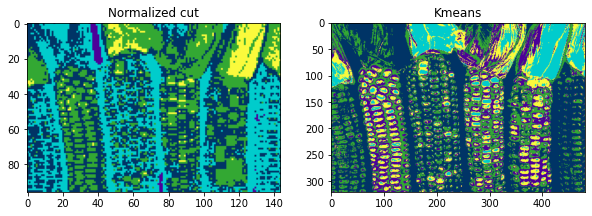

For segmention  1
*****KMEANS******
Entropy for cluster  0  =  2.258844876529174
Entropy for cluster  1  =  3.3203118326137915
Entropy for cluster  2  =  2.6144592104673277
Entropy for cluster  3  =  2.3491972200735787
Entropy for cluster  4  =  2.246874642115533
Conditional Entropy(weighted sum of entropies) =  2.735330694844808
****************************************** 
F-measure for cluster = 0 = 0.25830154020065
F-measure for cluster = 1 = 0.2793983116597381
F-measure for cluster = 2 = 0.24138722260464812
F-measure for cluster = 3 = 0.25022615866871434
F-measure for cluster = 4 = 0.3011175648849349
Total F = 0.2660861596037371
*****Normalized cut******
Entropy for cluster  0  =  2.9778505110485463
Entropy for cluster  1  =  3.0279430911197975
Entropy for cluster  2  =  3.042100868952033
Entropy for cluster  3  =  2.892668852521027
Entropy for cluster  4  =  1.8759095870657612
Conditional Entropy(weighted sum of entropies) =  2.999511005471713
**************************************

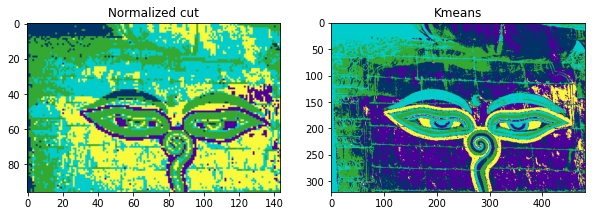

For segmention  1
*****KMEANS******
Entropy for cluster  0  =  1.279130667965809
Entropy for cluster  1  =  1.0386064817170297
Entropy for cluster  2  =  1.3002916425432314
Entropy for cluster  3  =  1.0052896687634387
Entropy for cluster  4  =  0.778623486401832
Conditional Entropy(weighted sum of entropies) =  1.0680183662093676
****************************************** 
F-measure for cluster = 0 = 0.2429717690787339
F-measure for cluster = 1 = 0.41290339866304077
F-measure for cluster = 2 = 0.31384192715227055
F-measure for cluster = 3 = 0.351424021719268
F-measure for cluster = 4 = 0.4598765850681494
Total F = 0.35620354033629253
*****Normalized cut******
Entropy for cluster  0  =  1.072883421113872
Entropy for cluster  1  =  1.4332451061514022
Entropy for cluster  2  =  1.4118130325420875
Entropy for cluster  3  =  1.1538310385284827
Entropy for cluster  4  =  1.0929583478308884
Conditional Entropy(weighted sum of entropies) =  1.2135325942485073
*********************************

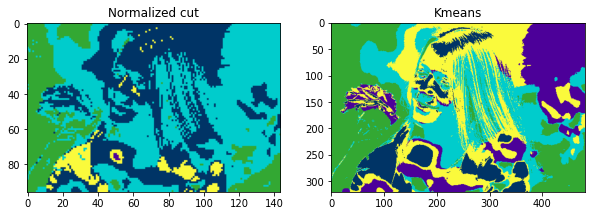

For segmention  1
*****KMEANS******
Entropy for cluster  0  =  2.345087955191469
Entropy for cluster  1  =  2.8801405481553393
Entropy for cluster  2  =  1.1918141269461893
Entropy for cluster  3  =  2.79687661046732
Entropy for cluster  4  =  2.1071889843606106
Conditional Entropy(weighted sum of entropies) =  2.1907517232068083
****************************************** 
F-measure for cluster = 0 = 0.2502722483297197
F-measure for cluster = 1 = 0.45763457683469416
F-measure for cluster = 2 = 0.584815002139828
F-measure for cluster = 3 = 0.3474242471234066
F-measure for cluster = 4 = 0.27614297227244017
Total F = 0.38325780934001774
*****Normalized cut******
Entropy for cluster  0  =  2.7426723314871366
Entropy for cluster  1  =  2.584647104127452
Entropy for cluster  2  =  2.5523045875780976
Entropy for cluster  3  =  2.6217989854928114
Entropy for cluster  4  =  2.0403733936884962
Conditional Entropy(weighted sum of entropies) =  2.652411307497748
***********************************

In [ ]:

for I in range(0,5):
    print("image ",I+1 )
    kL=[]
    for j in  range(0,len(Segmented_Labels[I])):
       kL.append(colors[int(Segmented_Labels[I][j])])


    x,y,z=Segmented_imgs[I].shape
    f, axarr = plt.subplots(1,2,figsize=(10,10))
    axarr[0].imshow(Segmented_imgsN[I])
    axarr[0].set_title('Normalized cut')
    axarr[1].imshow(np.array(kL).reshape(x,y,z))
    axarr[1].set_title('Kmeans')
 
    sumF=0
    plt.show()
    for s in range(0,5):
  
       print("For segmention ",s+1)
       ##Kmeans
       print("*****KMEANS******")
       CM=contingency_matrix(TrialGT[I][s], Segmented_Labels[I])
       entropy=Conditional_entropy(CM.T)
       print('****************************************** ')
       sumF = sumF+Fmeasure(CM.T)
       print("*****Normalized cut******")
       x=np.array(Segmented_imgsN[I].shape[0])
       y=np.array(Segmented_imgsN[I].shape[1])
       t=cv2.resize(TrialGT[I][s], dsize=(x,y))
       
       CM=contingency_matrix(np.array(t),LabelsN[I])
       entropy=Conditional_entropy(CM.T)
       print('****************************************** ')
       sumF = sumF+Fmeasure(CM.T)




  


    

  
  

### **Extra**

In [ ]:
def Uncolored_kmeans(k,image):
  model = KMeans(n_clusters=k, random_state=0).fit(image)
  return model.labels_
  

In [ ]:
Spatial_images=[]
for k in range(0,5):
  d1,d2,d3=TrialImages[k].shape
  Simage=[]
  for i in range(0,d1):
    for j in range(0,d2):
      Simage.append(np.append(TrialImages[k][i][j],[i,j]))
  Spatial_images.append(Simage)
print(np.array(Spatial_images).shape)


(5, 154401, 5)


In [ ]:
spatial=[]
colored=[]
for i in range(0,5):
  spatial.append(Uncolored_kmeans(5,np.array(Spatial_images[i])))
  colored.append(Uncolored_kmeans(5,np.array(TrialImages[i]).reshape((-1,3))))
 


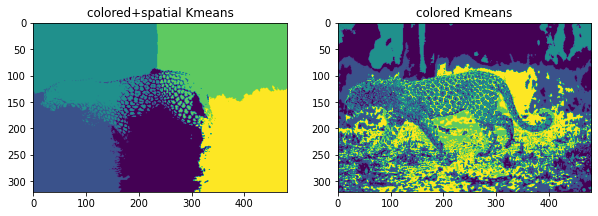

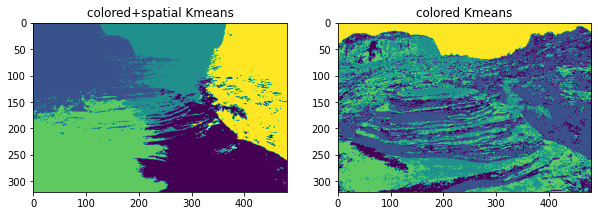

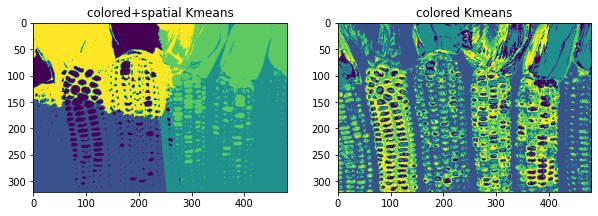

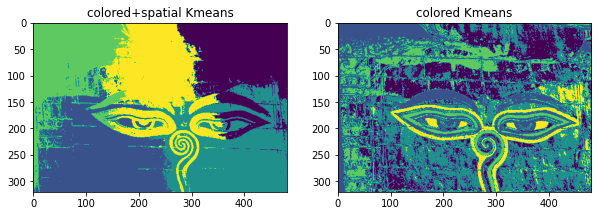

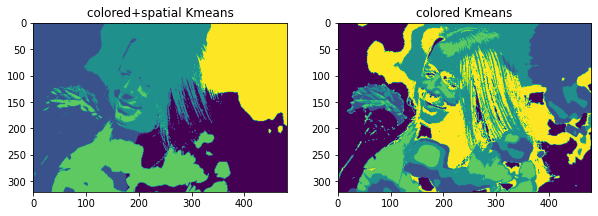

In [ ]:
for i in range(0,5):
  d1,d2,d3=TrialImages[i].shape
  f, axarr = plt.subplots(1,2,figsize=(10,10))
  axarr[0].imshow(spatial[i].reshape((d1,d2)))
  axarr[0].set_title('colored+spatial Kmeans')
  axarr[1].imshow(colored[i].reshape((d1,d2)))
  axarr[1].set_title('colored Kmeans')
  
